# Frekvencijski spektar
## Sinusni signal
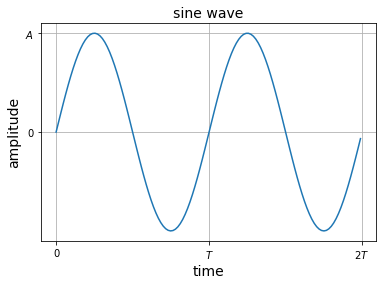

Spektar sinusnog signala sadrži samo komponentu osnovnog harmonika c[1]=$A$. Srednja vrijednost sinusnog signala prikazanog slikom jednaka je 0, pa je time c[0]=0. 

In [23]:
def sine_spectra(A,T,unit,output):    
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 1):
            c[n] = A
        else:
            c[n] = 0
    
    # RMS output of spectral components
    if (output == 'RMS'):
        for n in range(len(c)):
            c[n] = c[n]/np.sqrt(2)
    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            if (c[n] == 0):
                c[n] = np.nan
            else:
                c[n] = 20*np.log10(np.abs(c[n])/1e-3)
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            if (c[n] == 0):
                c[n] = np.nan
            else:
                c[n] = 20*np.log10(np.abs(c[n])/1e-6)              
        return c,f

## Trapezni signal
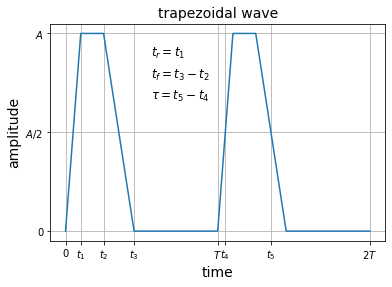

Komponente spektra uz $t_r=t_f$ računaju se prema sljedećim formulama (Paul 2006):

\begin{equation*}
c[0] = \frac{A\tau}{T}
\end{equation*}


\begin{equation*}
c[n] = \frac{2A\tau}{T}\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right | \left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |,
\end{equation*}
gdje c[0] predstavlja amplitudu DC komponente, c[1] amplitudu osnovne frekvencije, a npr. c[4] predstavlja amplitudu 4. harmonika frekvencijskog spektra. Ovojnica spektra trapeznog signala računa se prema formuli
\begin{equation*}
20\log(envelope)=20\log(\frac{2A\tau}{T}) + 20\log(\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right |) + 20\log(\left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |)
\end{equation*}
Ovojnica spektra trokutnog signala ima dvije kaakteristične frekvencije:
- prve karakteristična frekvencija $f_1=1/\pi \tau$, spektar opada s -20 dB/dek,
- druga karakteristična frekvencija $f_2=1/\pi t_r$, spektar opada s -40 dB/dek. 

Snaga sadržana u signalu računa se prema sljedećoj jednadžbi,
\begin{equation*}
P=c[0]^2+\frac{1}{2}c[1]^2+\frac{1}{2}c[2]^2+\frac{1}{2}c[3]^2+...
\end{equation*}

In [24]:
def trap_spectra(A,T,tau,tr,unit,output):
    # calculation of spectra components
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = A*(tau/T)
        else:
            sinx_x1 = np.sin((n)*np.pi*tau/T)/((n)*np.pi*tau/T)
            sinx_x2 = np.sin((n)*np.pi*tr/T)/((n)*np.pi*tr/T)
            c[n] = 2*A*(tau/T)*sinx_x1*sinx_x2                     
            
    # RMS output of spectral components
    # skipped DC coefficient
    if (output == 'RMS'):
        for n in range(1,len(c)):
            c[n] = c[n]/np.sqrt(2)    
            
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            if (c[n] == 0):
                c[n] = np.nan
            else:
                c[n] = 20*np.log10(np.abs(c[n])/1e-3)
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            if (c[n] == 0):
                c[n] = np.nan
            else:            
                c[n] = 20*np.log10(np.abs(c[n])/1e-6)
        return c,f

def envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax,output):    
    # from fmin to 1/(pi*tau)
    temp1 = np.linspace(fmin, 1/(np.pi*tau), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 2*A*tau/T) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tau) to 1/(pi*tr)
    temp1 = np.linspace(1/(np.pi*tau), 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*20)
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
    
    # RMS output of envelope
    if (output == 'RMS'):
        for n in range(len(envelope)):
            envelope[n] = envelope[n]/np.sqrt(2)        
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)

## Trokutni signal
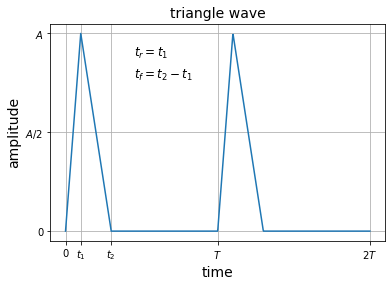

Spektar trokutnog signala dobije se kao poseban slučaj trapeznog, tj. kada je $\tau=t_r=t_f$. U izračunu se podešava samo vrijeme porasta $t_r$ (ne podešava se $\tau$). Ovojnica spektra trapeznog signala ima samo jednu karakterističnu frekvenciju $f_1=1/\pi t_r$ nakon koje spektar opada s -40 dB/dek. 

In [38]:
def isotriangle_spectra(A,T,tr,unit,output):
    # calculation of spectra components
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            #c[n] = 0.5*A
            c[n] = A*(tr/T)
        else:
            nom1 = np.sin((n)*np.pi*tr/T)
            den1 = (n)*np.pi*tr/T 
            c[n] = 2*A*(tr/T)*(nom1/den1)**2 
            
    # RMS output of spectral components
    # skipped DC coefficient
    if (output == 'RMS'):
        for n in range(1,len(c)):
            c[n] = c[n]/np.sqrt(2)            
                    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            if (c[n] == 0):
                c[n] = np.nan
            else:
                c[n] = 20*np.log10(np.abs(c[n])/1e-3)
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            if (c[n] == 0):
                c[n] = np.nan
            else:
                c[n] = 20*np.log10(np.abs(c[n])/1e-6)
        return c,f
    
def envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax,output):    
    # from fmin to 1/(pi*tr)
    temp1 = np.linspace(fmin, 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 2*A*tr/T) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
    
    # RMS output of envelope
    if (output == 'RMS'):
        for n in range(len(envelope)):
            envelope[n] = envelope[n]/np.sqrt(2)        
         
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)   
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)    

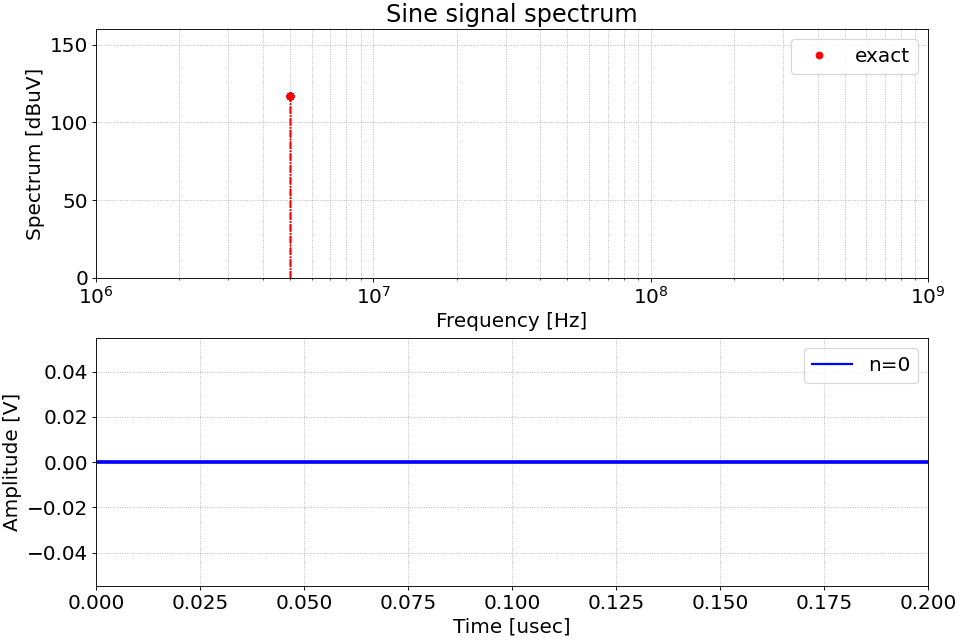

In [42]:
%matplotlib widget
from ipywidgets import Layout
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# no of spectra coefficients
noC = 100

option1 = 'sine signal'
option2 = 'trapezoidal signal'
option3 = 'triangle signal'
option4 = 'AC only'
option5 = 'DC + AC'
option6 = 'RMS'
option7 = 'ABS'

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=1, max=8, step=1, value=1e6,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=7, max=10, step=1, value=1e9,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)

ymin = widgets.IntSlider(min=0,max=100, step=1, value=0,description='$y_{min}$:',readout_format='.4f',style=style,layout=Layout(width='75%'), continuous_update=False)
tymin = widgets.Text(value='0',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change10(change):
    if float(change.new) < ymin.min:
        ymin.min = float(change.new)
    if float(change.new) > ymin.max:
        ymin.max = float(change.new)
    ymin.value = float(change.new)
tymin.observe(text_change10, names='value')

ymax = widgets.IntSlider(min=1,max=200, step=1, value=160,description='$y_{max}$:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)
tymax = widgets.Text(value='160',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change11(change):
    if float(change.new) < ymax.min:
        ymax.min = float(change.new)
    if float(change.new) > ymax.max:
        ymax.max = float(change.new)
    ymax.value = float(change.new)
tymax.observe(text_change11, names='value')

bunit = widgets.ToggleButtons(options=['[dBuV]', '[dBmV]', '[V]'], description='Unit:',disabled=False,button_style='',style=style,layout=Layout(width='75%'), continuous_update=False)

sA = widgets.FloatSlider(min=1, max=400, step=1, value=1,description='$A$ [V]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tA = widgets.Text(value='1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change1(change):
    if float(change.new) < sA.min:
        sA.min = float(change.new)
    if float(change.new) > sA.max:
        sA.max = float(change.new)
    sA.value = float(change.new)
tA.observe(text_change1, names='value')

sT = widgets.FloatSlider(min=0.01, max=20, step=0.01, value=0.2,description='$T$ [usec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tT = widgets.Text(value='0.2',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change2(change):
    if float(change.new) < sT.min:
        sT.min = float(change.new)
    if float(change.new) > sA.max:
        sT.max = float(change.new)
    sT.value = float(change.new)
tT.observe(text_change2, names='value')

stau = widgets.FloatSlider(min=0.001,max=20,step=0.01, value=0.1,description='$\\tau$ [usec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ttau = widgets.Text(value='0.1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change3(change):
    if float(change.new) < stau.min:
        stau.min = float(change.new)
    if float(change.new) > sA.max:
        stau.max = float(change.new)
    stau.value = float(change.new)
ttau.observe(text_change3, names='value')

sstr = widgets.FloatSlider(min=0.001,max=100,step=0.01, value=1,description='$t_r$ [nsec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tstr= widgets.Text(value='1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change4(change):
    if float(change.new) < sstr.min:
        sstr.min = float(change.new)
    if float(change.new) > sA.max:
        sstr.max = float(change.new)
    sstr.value = float(change.new)
tstr.observe(text_change4, names='value')

scoeff = widgets.IntSlider(value=0,min=0,max=noC-1,step=1,description='coeff. no.:',style=style,layout=Layout(width='75%'), continuous_update=False)

tcoeff = widgets.Text(value='',placeholder='-',description='RMS coeff. value:',style=style,layout=Layout(width='75%'))
twarn = widgets.Text(value='',placeholder='-',description='msg:',style=style,layout=Layout(width='75%'))

rb1 = widgets.RadioButtons(options=[option1,option2,option3], description='',style=style,layout=Layout(width='75%'))
rb2 = widgets.RadioButtons(options=[option4,option5], description='',style=style,layout=Layout(width='75%'))
rb3 = widgets.RadioButtons(options=[option6,option7], description='',style=style,layout=Layout(width='75%'))

tc = [i for i in range(11)]
tc[0] = widgets.Text(value='',placeholder='-',description='c[0]:',style=style,layout=Layout(width='75%'))
tc[1] = widgets.Text(value='',placeholder='-',description='c[1]:',style=style,layout=Layout(width='75%'))
tc[2] = widgets.Text(value='',placeholder='-',description='c[2]:',style=style,layout=Layout(width='75%'))
tc[3] = widgets.Text(value='',placeholder='-',description='c[3]:',style=style,layout=Layout(width='75%'))
tc[4] = widgets.Text(value='',placeholder='-',description='c[4]:',style=style,layout=Layout(width='75%'))
tc[5] = widgets.Text(value='',placeholder='-',description='c[5]:',style=style,layout=Layout(width='75%'))
tc[6] = widgets.Text(value='',placeholder='-',description='c[6]:',style=style,layout=Layout(width='75%'))
tc[7] = widgets.Text(value='',placeholder='-',description='c[7]:',style=style,layout=Layout(width='75%'))
tc[8] = widgets.Text(value='',placeholder='-',description='c[8]:',style=style,layout=Layout(width='75%'))
tc[9] = widgets.Text(value='',placeholder='-',description='c[9]:',style=style,layout=Layout(width='75%'))
tc[10] = widgets.Text(value='',placeholder='-',description='c[10]:',style=style,layout=Layout(width='75%'))

sumtc = [i for i in range(11)]
sumtc[0] = widgets.Text(value='',placeholder='-',description='$P_{c[0]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[1] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[1]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[2] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[2]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[3] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[3]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[4] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[4]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[5] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[5]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[6] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[6]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[7] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[7]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[8] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[8]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[9] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[9]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtc[10] = widgets.Text(value='',placeholder='-',description='$P_{0.5\cdot c[10]^2}/P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))
sumtctot = widgets.Text(value='',placeholder='-',description='$P_{TOTAL}$ [W]:',style=style,layout=Layout(width='75%'))
ssumtctot = widgets.Text(value='',placeholder='-',description='$P_{TOTAL}$ [%]:',style=style,layout=Layout(width='75%'))

plt.rcParams.update({'font.size': 18})
fig1, (axes1, axes2) = plt.subplots(2, 1, figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k',constrained_layout=True)

axes1.set_xscale("log")
axes1.set_yscale("linear") 
axes1.set_xlabel('Frequency [Hz]')

axes2.set_xscale("linear")
axes2.set_yscale("linear") 
axes2.set_xlabel('Time [usec]')

def func1(fmin, fmax, ymin, ymax, unit, A, T, tau, tr, rrb1, rrb2, rrb3, coeff, t1, t2,  
          tcc0, tcc1, tcc2, tcc3, tcc4, tcc5, tcc6, tcc7, tcc8, tcc9, tcc10,
          scc0, scc1, scc2, scc3, scc4, scc5, scc6, scc7, scc8, scc9, scc10, sctot, ssctot): 
              
    npts = 100        
    T = T/1e6
    tau = tau/1e6
    tr = tr/1e9  
    
    axes1.set_ylabel('Spectrum '+unit)
    axes1.set_ylim(bottom = ymin, top = ymax)  
    axes1.set_xlim(left = fmin, right = fmax)               
    axes1.grid(True,which="both",ls=":")
    
    axes2.set_ylabel('Amplitude [V]')    
    ###axes2.set_ylim(bottom = ymin, top = ymax)  
    axes2.set_xlim(left = 0, right = T*1e6)                           
    axes2.grid(True,which="both",ls=":")    

    lines_to_delete = axes1.get_lines()
    for i in lines_to_delete:
        i.remove()
    for i in axes1.collections:
        i.remove() 
        
    lines_to_delete = axes2.get_lines()
    for i in lines_to_delete:
        i.remove()
    for i in axes2.collections:
        i.remove()  

    if (rrb1 == option1):
        axes1.set_title('Sine signal spectrum')
        
        if (rrb3 == option6):
            c,f1 = sine_spectra(A,T,'[V]', 'RMS')
        elif (rrb3 == option7):
            c,f1 = sine_spectra(A,T,'[V]', 'ABS')

        sumc = 0 # total power W
        for i in range(len(c)):
            if (i == 0):
                if (rrb2 == option5): # option5 = 'DC + AC'
                    sumc = sumc + c[i]**2
            else:
                sumc = sumc + 0.5*c[i]**2         

        for i in range(1,11):
            sumtc[i].value = str(round(100*0.5*c[i]**2/sumc,2))
        
        ssumc = 0 # total power %
        for i in range(0,11):
            if (i == 0):
                if (rrb2 == option4): # only AC
                    sumtc[0].value = '-'
                if (rrb2 == option5): # option5 = 'DC + AC'
                    sumtc[0].value = str(round(100*c[0]**2/sumc,2))
                    ssumc = float(sumtc[0].value)
            else:
                ssumc = ssumc + float(sumtc[i].value)

        sumtctot.value = str(sumc)         
        ssumtctot.value = str(ssumc)        
        
        time = np.linspace(0, T, npts)
        signal = []
        for i in range(int(coeff)+1):
            if i == 0:                
                signal = c[i]*np.ones(npts)
            elif i == 1:
                rad = np.linspace(0, i*2*np.pi, npts)
                phase = i*np.pi*(2*tr)/T               
                if (rrb3 == option6): # 'RMS'
                    signal = signal + np.sqrt(2)*c[i]*np.cos(rad+phase)  
                elif (rrb3 == option7): # 'ABS'
                    signal = signal + c[i]*np.cos(rad+phase)  

        
        twarn.value = 'parameters ok!!!!'     

        if (rrb3 == option6):     
            c,f1 = sine_spectra(A,T,unit, 'RMS')
        elif (rrb3 == option7):
            c,f1 = sine_spectra(A,T,unit, 'ABS')      
        line, = axes2.plot(time*1e6, signal, lw=2, color='blue')                                
        markerline, stemline, baseline = axes1.stem(f1, c, '-.',label='exact')#,use_line_collection=True)        

        for i in range(0,11):
            tc[i].value = str(round(c[i],2))
    
    elif (rrb1 == option2):
        axes1.set_title('Trapezodial signal spectrum')

        if (rrb3 == option6):
            c,f1 = trap_spectra(A,T,tau,tr,'[V]', 'RMS')      
            envelope,f2 = envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax, 'RMS')        
        elif (rrb3 == option7):
            c,f1 = trap_spectra(A,T,tau,tr,'[V]', 'ABS')         
            envelope,f2 = envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax, 'ABS')                            

        sumc = 0 # total power W
        for i in range(len(c)):
            if (i == 0):
                if (rrb2 == option5): # option5 = 'DC + AC'
                    sumc = sumc + c[i]**2
            else:
                sumc = sumc + 0.5*c[i]**2         

        for i in range(1,11):
            sumtc[i].value = str(round(100*0.5*c[i]**2/sumc,2))

        ssumc = 0 # total power %
        for i in range(0,11):
            if (i == 0):
                if (rrb2 == option4): # only AC
                    sumtc[0].value = '-'
                if (rrb2 == option5): # option5 = 'DC + AC'
                    sumtc[0].value = str(round(100*c[0]**2/sumc,2))
                    ssumc = float(sumtc[0].value)
            else:
                ssumc = ssumc + float(sumtc[i].value)
       
        sumtctot.value = str(sumc)         
        ssumtctot.value = str(ssumc)                 
       
        time = np.linspace(0, T, npts)
        signal = []
        for i in range(int(coeff)+1):
            if i == 0:                
                signal = c[i]*np.ones(npts)
            else:
                rad = np.linspace(0, i*2*np.pi, npts)
                phase = i*np.pi*(tau+tr)/T               
                if (rrb3 == option6): # 'RMS'
                    signal = signal + np.sqrt(2)*c[i]*np.cos(rad+phase)  
                elif (rrb3 == option7): # 'ABS'
                    signal = signal + c[i]*np.cos(rad+phase)  
               
        if (T < tau + tr):                
            twarn.value = 'T < tau + tr !!!'
        else:
            twarn.value = 'parameters ok!!!!' + '; f1 = '+"{0:.2f}".format(1e-6/(np.pi*tau))+' MHz' + '; f2 = '+"{0:.2f}".format(1e-6/(np.pi*tr))+' MHz'  

        if (rrb3 == option6):     
            c,f1 = trap_spectra(A,T,tau,tr,unit,'RMS') 
        elif (rrb3 == option7):
            c,f1 = trap_spectra(A,T,tau,tr,unit,'ABS') 
        line, = axes2.plot(time*1e6, signal, lw=2, color='blue')            
        line, = axes1.plot(f2, envelope, lw=2, color='blue',label='envelope')         
        markerline, stemline, baseline = axes1.stem(f1, c, '-.',label='exact')#,use_line_collection=True)   

        for i in range(0,11):
            tc[i].value = str(round(c[i],2))

    elif (rrb1 == option3):
        axes1.set_title('Triangle signal spectrum')

        if (rrb3 == option6):
            c,f1 = isotriangle_spectra(A,T,tr,'[V]', 'RMS')
            envelope,f2 = envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax, 'RMS')        
        elif (rrb3 == option7):
            c,f1 = isotriangle_spectra(A,T,tr,'[V]', 'ABS')       
            envelope,f2 = envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax, 'ABS')           

        sumc = 0 # total power W
        for i in range(len(c)):
            if (i == 0):
                if (rrb2 == option5): # option5 = 'DC + AC'
                    sumc = sumc + c[i]**2
            else:
                sumc = sumc + 0.5*c[i]**2         

        for i in range(1,11):
            sumtc[i].value = str(round(100*0.5*c[i]**2/sumc,2))

        ssumc = 0 # total power %
        for i in range(0,11):
            if (i == 0):
                if (rrb2 == option4): # only AC
                    sumtc[0].value = '-'
                if (rrb2 == option5): # option5 = 'DC + AC'
                    sumtc[0].value = str(round(100*c[0]**2/sumc,2))
                    ssumc = float(sumtc[0].value)
            else:
                ssumc = ssumc + float(sumtc[i].value)
       
        sumtctot.value = str(sumc)         
        ssumtctot.value = str(ssumc)      
        
        time = np.linspace(0, T, npts)
        signal = []
        for i in range(int(coeff)+1):
            if i == 0:                
                signal = c[i]*np.ones(npts)
            else:
                rad = np.linspace(0, i*2*np.pi, npts)
                phase = i*np.pi*(2*tr)/T           
                if (rrb3 == option6): # 'RMS'
                    signal = signal + np.sqrt(2)*c[i]*np.cos(rad+phase)  
                elif (rrb3 == option7): # 'ABS'
                    signal = signal + c[i]*np.cos(rad+phase)                         
                
        if (T < 2*tr):                
            twarn.value = 'T < 2*tr !!!'
        else:
            twarn.value = 'parameters ok!!!!' + '; f2 = '+"{0:.2f}".format(1e-6/(np.pi*tr))+' MHz'    

        if (rrb3 == option6):     
            c,f1 = isotriangle_spectra(A,T,tr,unit,'RMS')
        elif (rrb3 == option7):
            c,f1 = isotriangle_spectra(A,T,tr,unit,'ABS')
        line, = axes2.plot(time*1e6, signal, lw=2, color='blue')          
        line, = axes1.plot(f2, envelope, lw=2, color='blue',label='envelope')          
        markerline, stemline, baseline = axes1.stem(f1, c, '-.',label='exact')#,use_line_collection=True)     

        for i in range(0,11):
            tc[i].value = str(round(c[i],2))
    
    tcoeff.value = 'c['+str(int(coeff))+'] = '+"{0:.2f}".format(c[int(coeff)])+unit+' @ '+"{0:.2f}".format(1e-6*(coeff)/T)+' MHz'                    
    
    plt.setp(baseline, color='r', linewidth=0)
    plt.setp(stemline, color='r', linewidth=1)
    plt.setp(markerline, color='r', linewidth=2)   

    if (rrb1 == option1):
        linesL = [markerline]
        axes1.legend([linesL[i] for i in [0]], ['exact'], loc=1)        
    else:
        linesL = [line, markerline]
        axes1.legend([linesL[i] for i in [0,1]], ['envelope', 'exact'], loc=1)
    axes2.legend(['n='+str(int(coeff))])

out = widgets.interactive_output(func1, 
                                 {'fmin': fmin, 'fmax': fmax, 'ymin': ymin, 'ymax': ymax, 'unit' : bunit, 
                                  'A': sA, 'T': sT, 'tau': stau, 'tr': sstr, 'rrb1' : rb1, 'rrb2' : rb2, 'rrb3' : rb3, 'coeff': scoeff, 't1': tcoeff, 't2': twarn,
                                  'tcc0': tc[0], 'tcc1': tc[1], 'tcc2': tc[2], 'tcc3': tc[3], 
                                  'tcc4': tc[4], 'tcc5': tc[5], 'tcc6': tc[6], 'tcc7': tc[7], 
                                  'tcc8': tc[8], 'tcc9': tc[9], 'tcc10': tc[10],
                                  'scc0': sumtc[0], 'scc1': sumtc[1], 'scc2': sumtc[2], 
                                  'scc3': sumtc[3], 'scc4': sumtc[4], 'scc5': sumtc[5], 
                                  'scc6': sumtc[6], 'scc7': sumtc[7], 'scc8': sumtc[8],
                                  'scc9': sumtc[9], 'scc10': sumtc[10], 'sctot': sumtctot, 'ssctot': ssumtctot})
                                  

tab1 = widgets.VBox(children=[fmin,fmax, widgets.HBox(children=[ymin,tymin]), widgets.HBox(children=[ymax,tymax]), bunit])
tab2 = widgets.VBox(children=[widgets.HBox(children=[sA,tA]),widgets.HBox(children=[sT,tT]),widgets.HBox(children=[stau,ttau]),widgets.HBox(children=[sstr,tstr]),rb1,scoeff,tcoeff,twarn])
row1 = widgets.VBox(children=[tc[0],tc[1],tc[2],tc[3],tc[4],tc[5],tc[6],tc[7],tc[8],tc[9],tc[10],sumtctot])
row2 = widgets.VBox(children=[sumtc[0],sumtc[1],sumtc[2],sumtc[3],sumtc[4],sumtc[5],sumtc[6],sumtc[7],sumtc[8],sumtc[9],sumtc[10],ssumtctot])
col1 = widgets.HBox(children=[rb2,rb3])
tab3 = widgets.VBox(children=[col1,widgets.HBox(children=[row1,row2])])

tab = widgets.Tab(children=[tab1, tab2, tab3])
tab.set_title(0, 'plot')
tab.set_title(1, 'signal parameters')
tab.set_title(2, 'coefficients')

widgets.VBox([tab,out])
